# Models from the R stemming process

In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('../../datasets/data-stemmed-R.csv')
data.info()
Y = data['engagement.rate']
X = data.drop(columns=['engagement.rate'])
X.info()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Columns: 284 entries, chicken to n_emoji
dtypes: bool(9), float64(269), int64(6)
memory usage: 8.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Columns: 283 entries, chicken to n_emoji
dtypes: bool(9), float64(268), int64(6)
memory usage: 8.6 MB


In [15]:
def CVTest(model, str_model, X, Y, reg_metrics: pd.DataFrame, n_splits = 10):
    kf = KFold(n_splits, shuffle=True)
    for train_index, test_index in kf.split(X):
        start_learn = time.time()
        model.fit(X.iloc[train_index], Y.iloc[train_index])
        end_learn = time.time()
        exe_time_learn = end_learn - start_learn
        start_pred = time.time()
        Y_pred = model.predict(X.iloc[test_index])
        end_pred = time.time()
        exe_time_pred = end_pred - start_pred
        current_mae = mean_absolute_error(Y.iloc[test_index], Y_pred)
        current_mse = mean_squared_error(Y.iloc[test_index], Y_pred)
        current_rmse = mean_squared_error(Y.iloc[test_index], Y_pred, squared=False)
        reg_metrics.loc[len(reg_metrics)] = [str_model.upper(), current_mae, current_mse, current_rmse, exe_time_learn, exe_time_pred]

In [16]:
reg_metrics_text = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'TIME_LEARN', 'TIME_PREDICT'])

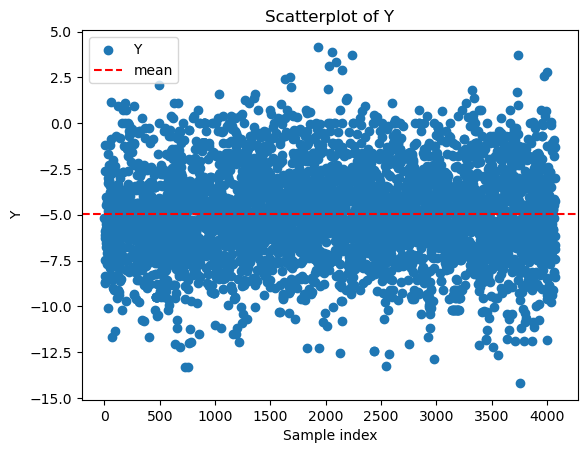

In [17]:
dummy = DummyRegressor()
CVTest(dummy, 'dummy', X, Y, reg_metrics_text)

#Scatterplot of Y
mean_y = np.mean(Y)
plt.scatter(np.arange(len(Y)), Y, label='Y')
plt.axhline(y=mean_y, color='r', linestyle='--', label='mean')    # Plot the mean
plt.title('Scatterplot of Y')
plt.xlabel('Sample index')
plt.ylabel('Y')
plt.legend()
plt.show()

In [18]:
# Decision Tree Regressor
# Initialize a decision tree regressor instance
tree_regressor = DecisionTreeRegressor()    # Try tuning on the hyperparameters: max_depth, min_samples_leaf, min_samples_split
CVTest(tree_regressor, 'tree', X, Y, reg_metrics_text)

In [19]:
# Random Forest Regressor
# Initialize a random forest regressor instance
rf_regressor = RandomForestRegressor(random_state=42)   # Try tuning on the hyperparameters: n_estimators, max_depth, min_samples_leaf, min_samples_split
CVTest(rf_regressor, 'rf', X, Y, reg_metrics_text)

In [20]:
sv_regressor = SVR()    #Try tuning on the kernel
CVTest(sv_regressor, 'sv', X, Y, reg_metrics_text)

In [21]:
knn_regressor = KNeighborsRegressor()       #Try tuning on the hyperparameters: n_neighbors, weights
CVTest(knn_regressor, 'knn', X, Y, reg_metrics_text)

    Model       MAE       MSE      RMSE  TIME_LEARN  TIME_PREDICT
0   DUMMY  2.021869  6.386764  2.527205    0.009933      0.002168
1   DUMMY  2.039628  6.708462  2.590070    0.005408      0.001901
2   DUMMY  2.134282  7.194057  2.682174    0.007758      0.001678
3   DUMMY  1.940645  6.012947  2.452131    0.004237      0.002171
4   DUMMY  1.868018  6.016641  2.452884    0.003710      0.001658
5   DUMMY  2.116285  7.007897  2.647243    0.004811      0.001641
6   DUMMY  1.941753  6.072355  2.464215    0.011592      0.002568
7   DUMMY  1.956062  6.495630  2.548653    0.006885      0.006025
8   DUMMY  2.100685  6.776675  2.603205    0.005638      0.002009
9   DUMMY  1.957486  6.373706  2.524620    0.005159      0.001383
10   TREE  1.399209  3.552982  1.884936    0.334765      0.014478
11   TREE  1.381149  3.819463  1.954345    0.364035      0.010323
12   TREE  1.288475  3.132249  1.769816    0.252274      0.009208
13   TREE  1.336327  3.363542  1.833996    0.245684      0.009822
14   TREE 

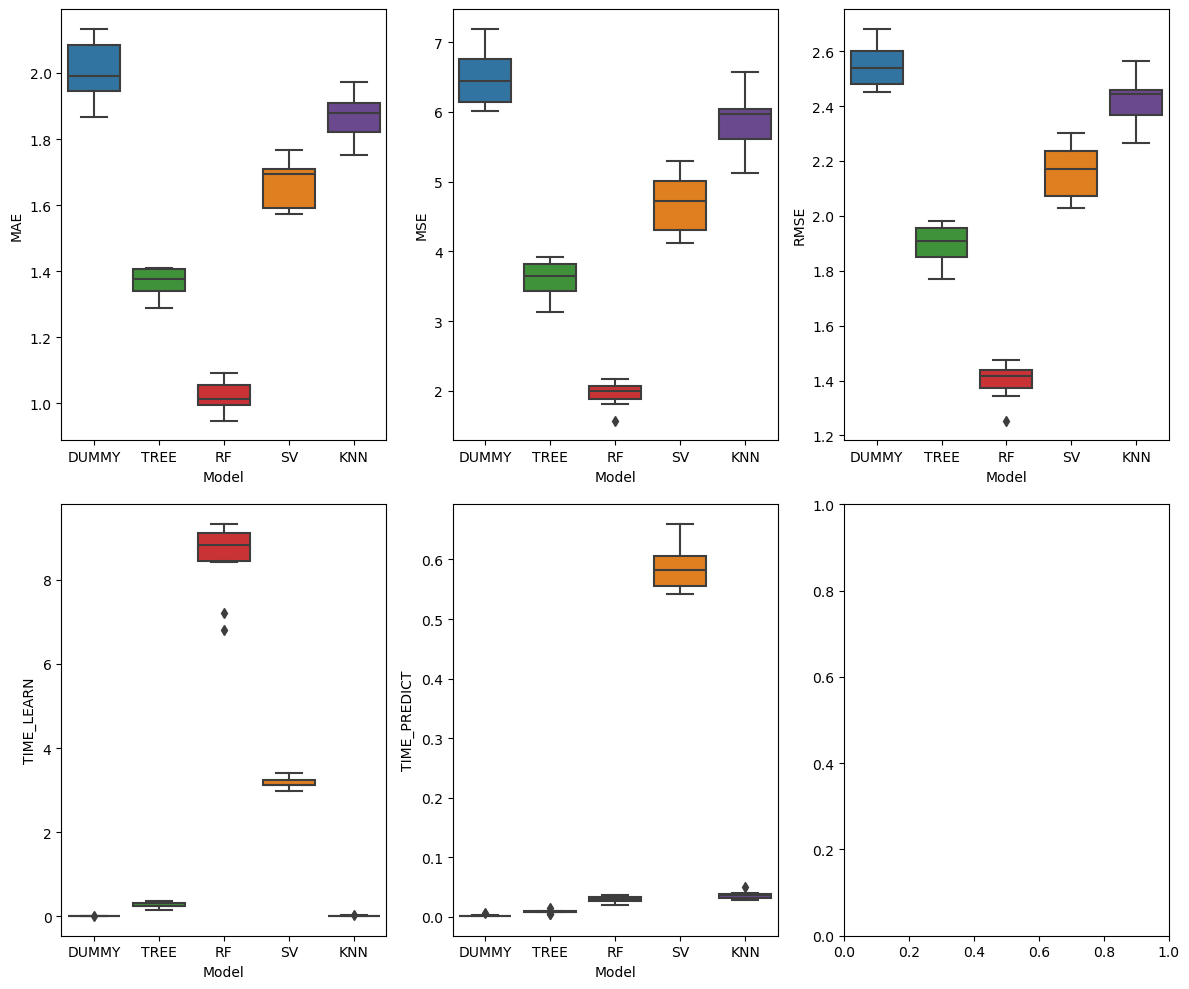

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
sns.boxplot(data=reg_metrics_text, x="Model", y="MAE", ax=axs[0, 0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="Model", y="MSE", ax=axs[0, 1], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="Model", y="RMSE", ax=axs[0, 2], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="Model", y="TIME_LEARN", ax=axs[1, 0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="Model", y="TIME_PREDICT", ax=axs[1, 1], palette=sns.color_palette('Paired')[1::2])


plt.tight_layout()
plt.show()